In [9]:
%matplotlib inline

from azureml import Workspace
import pandas as pd
import numpy as np

ws = Workspace()
ds = ws.datasets['breast-cancer-wisconsin.csv']
frame = ds.to_dataframe()


In [10]:
## Convert some columns to numeric values
cols = ['Bare Nuclei']
frame[cols] = frame[cols].apply(pd.to_numeric, args=('coerce',))

## Remove rows with missing values
frame.dropna(axis = 0, inplace = True)
frame.dtypes

ID                               int64
Clump Thickness                  int64
Uniformity of Cell Size          int64
Uniformity of Cell shape         int64
Marginal Adhension               int64
Single Epithelial Cell Size      int64
Bare Nuclei                    float64
Bland Chromatin                  int64
Normal Nucleoli                  int64
Mitoses                          int64
Class                            int64
dtype: object

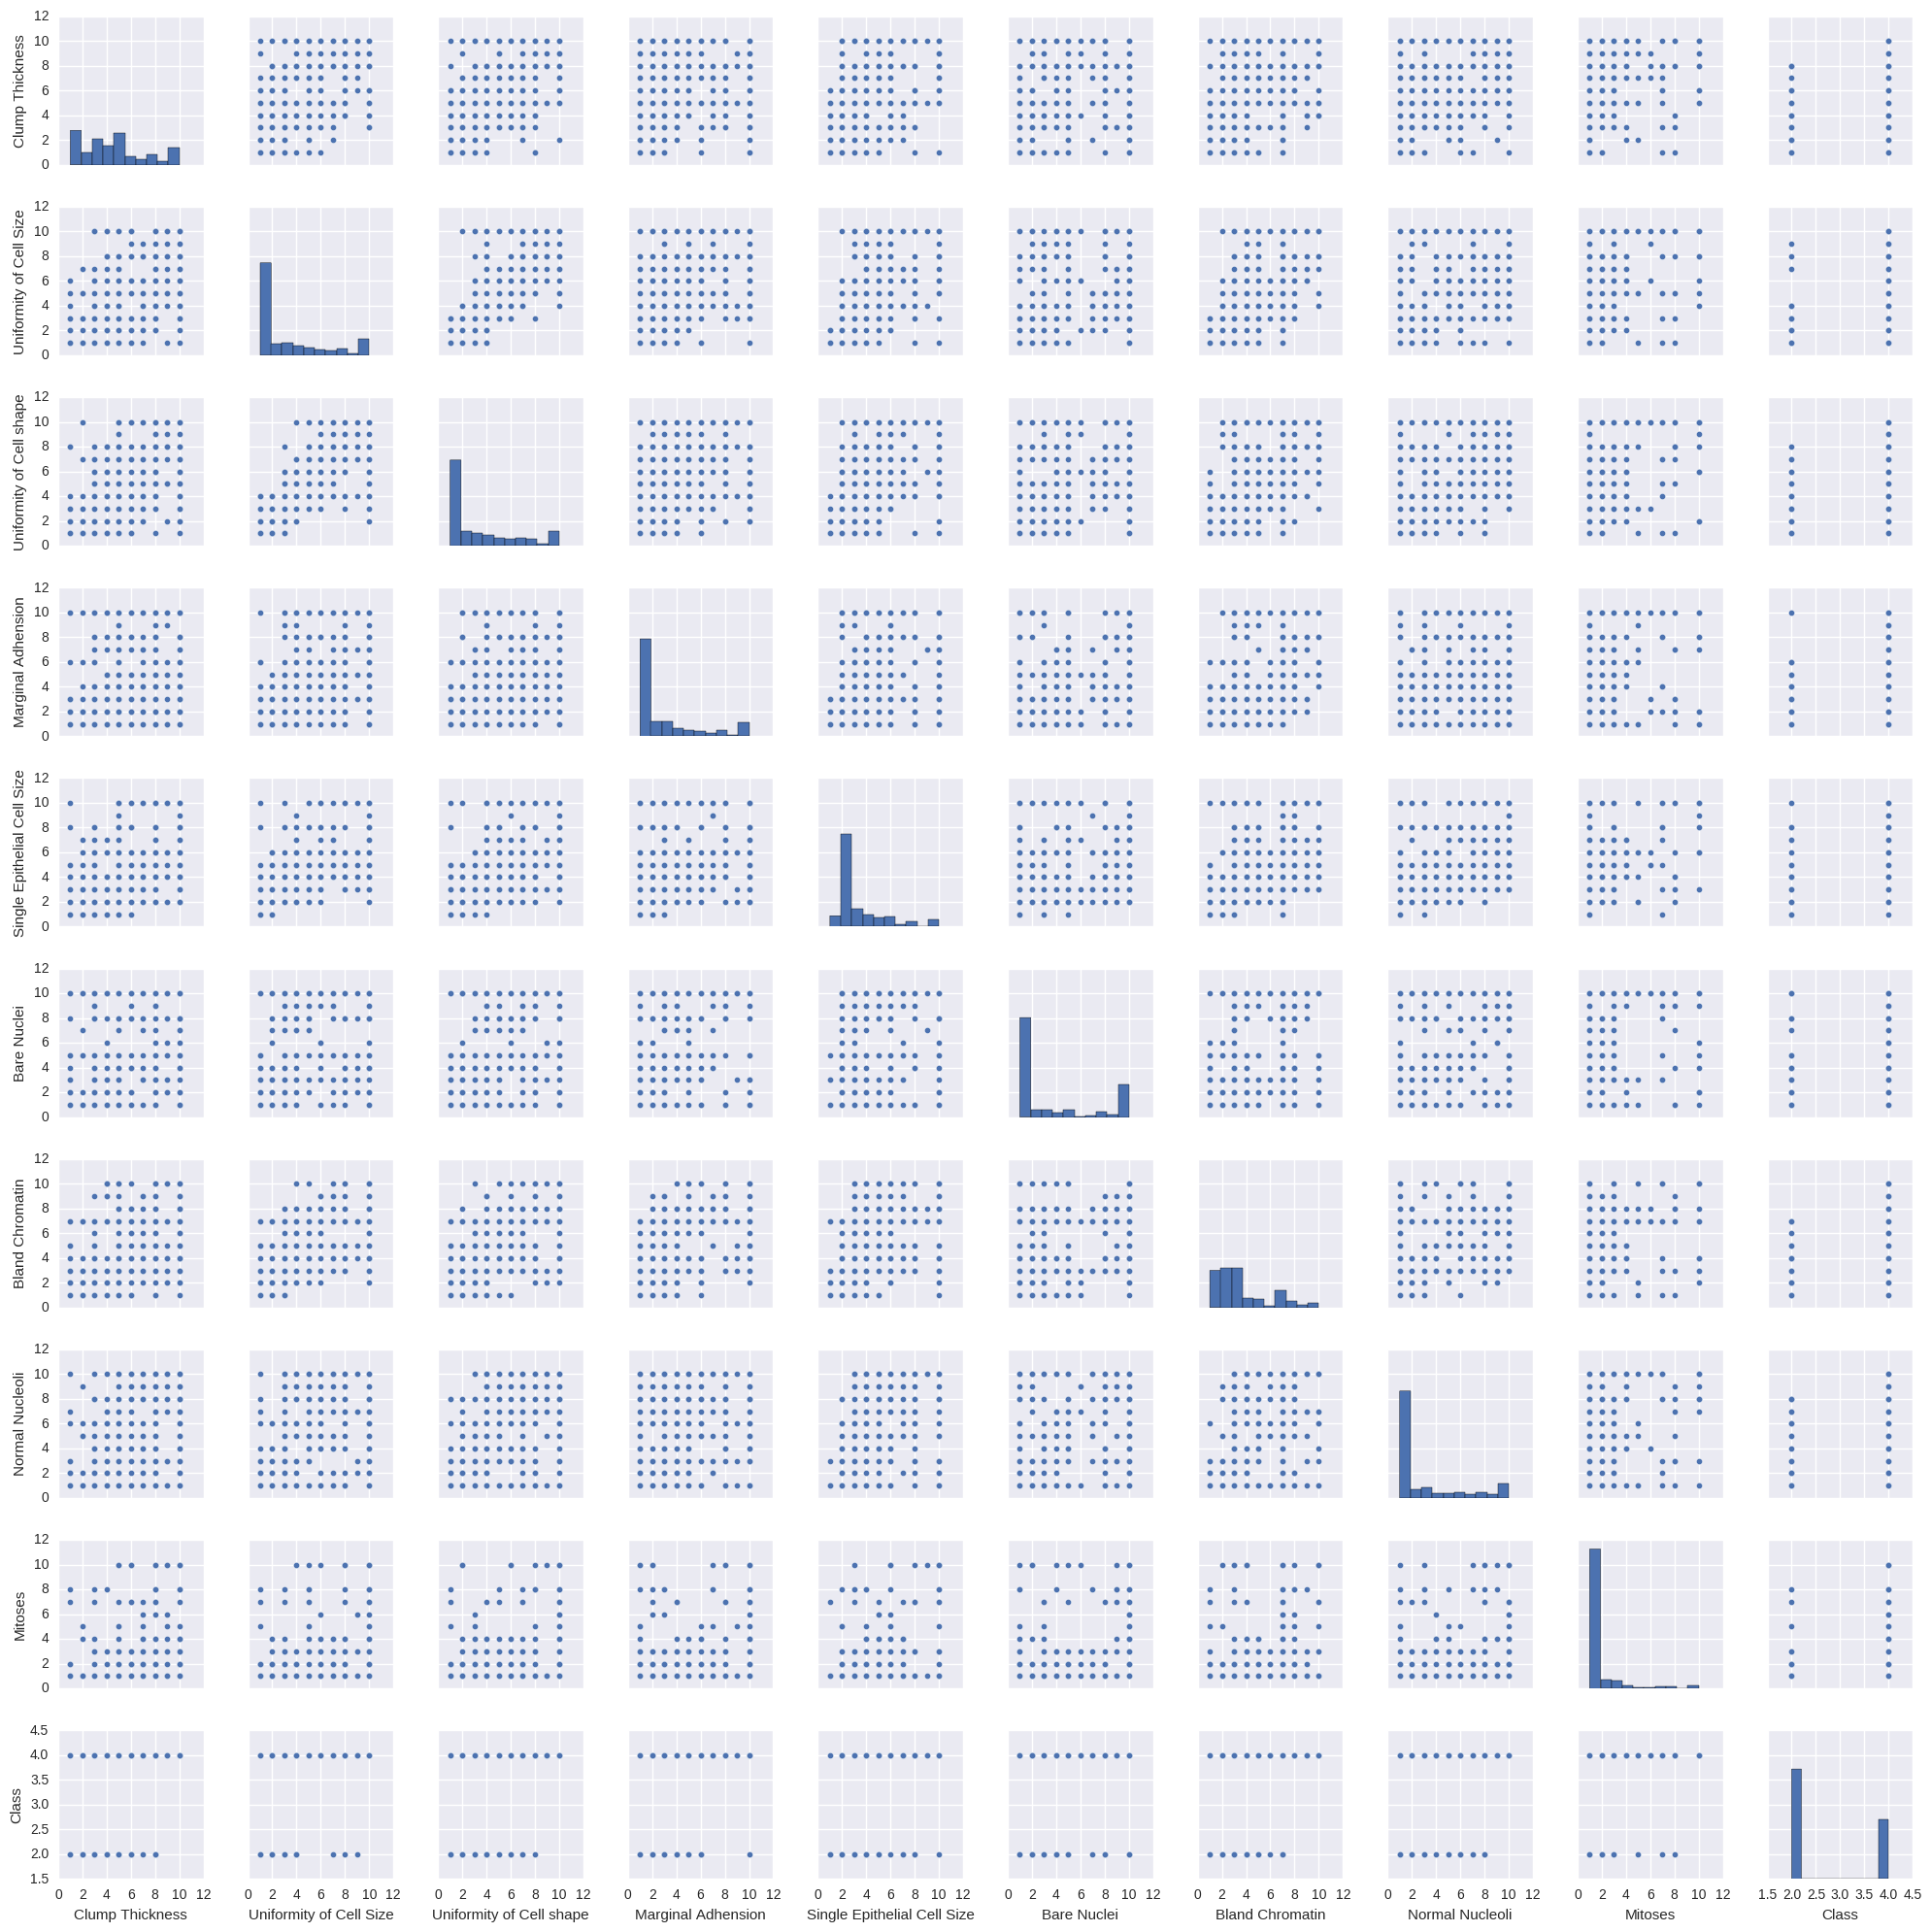

In [11]:
import seaborn as sns
num_cols = ["Clump Thickness","Uniformity of Cell Size","Uniformity of Cell shape","Marginal Adhension","Single Epithelial Cell Size","Bare Nuclei","Bland Chromatin","Normal Nucleoli","Mitoses","Class"]
sns.pairplot(frame[num_cols], size=2)

'Class'

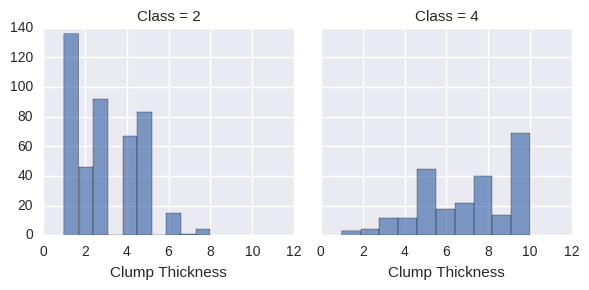

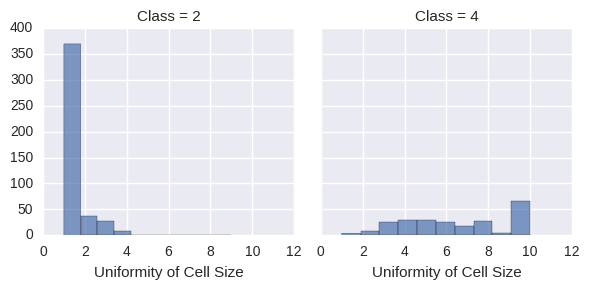

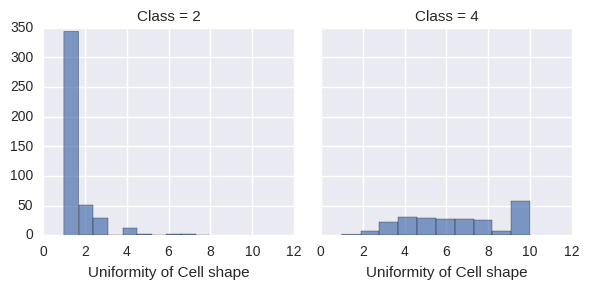

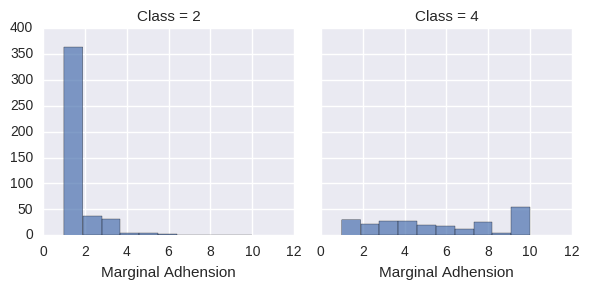

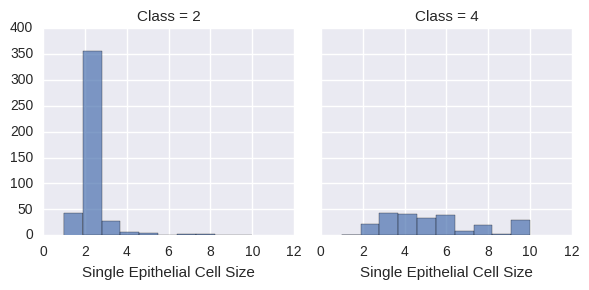

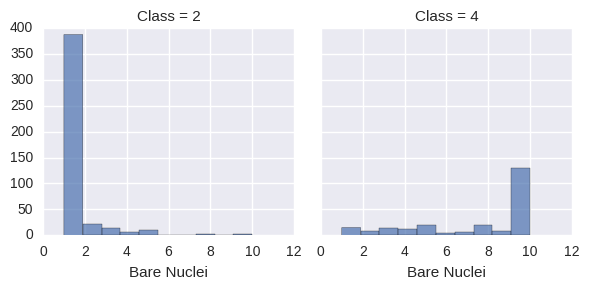

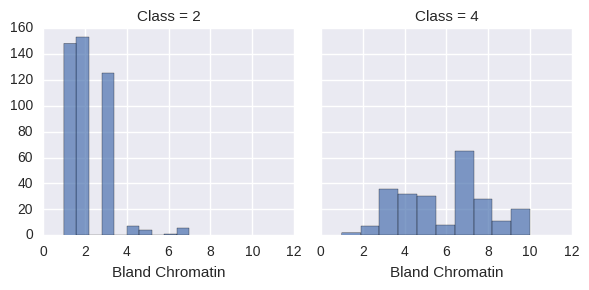

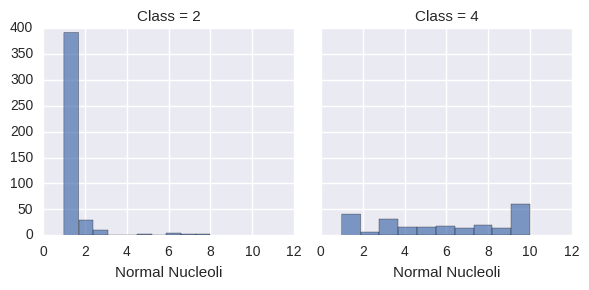

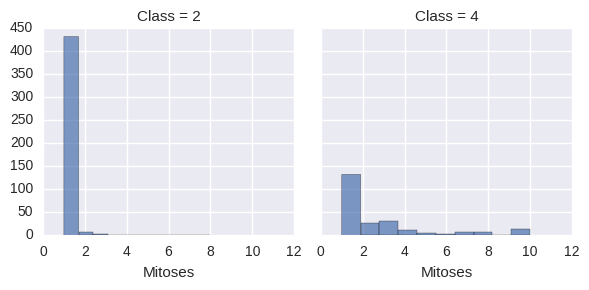

In [12]:
def cond_hists(df, plot_cols, grid_col):
    import matplotlib.pyplot as plt
    import seaborn as sns
    ## Loop over the list of columns
    for col in plot_cols:
        grid1 = sns.FacetGrid(df, col=grid_col)
        grid1.map(plt.hist, col, alpha=.7)
    return grid_col
    
## Define columns for making a conditioned histogram
plot_cols2 = ["Clump Thickness",
                 "Uniformity of Cell Size",
                 "Uniformity of Cell shape",
                 "Marginal Adhension",
                 "Single Epithelial Cell Size",
                 "Bare Nuclei",
                 "Bland Chromatin",
                 "Normal Nucleoli",
                 "Mitoses"]

cond_hists(frame, plot_cols2, 'Class' )

'Class'

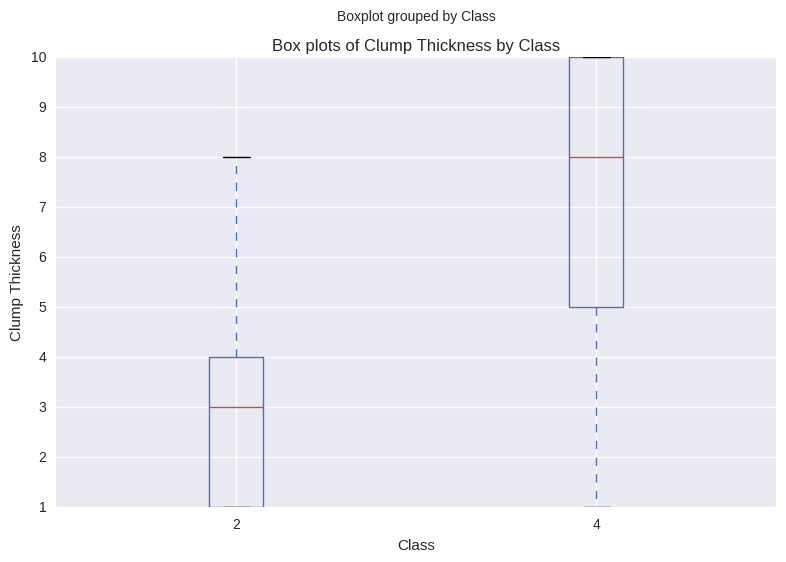

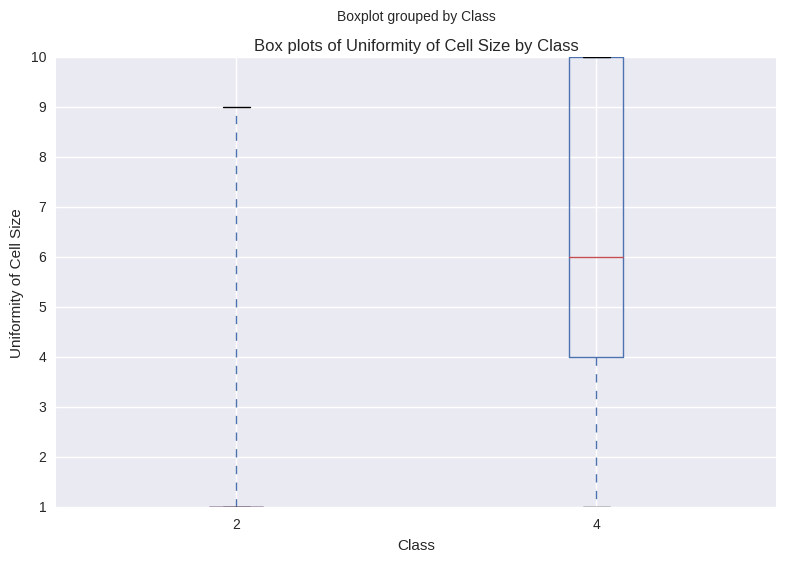

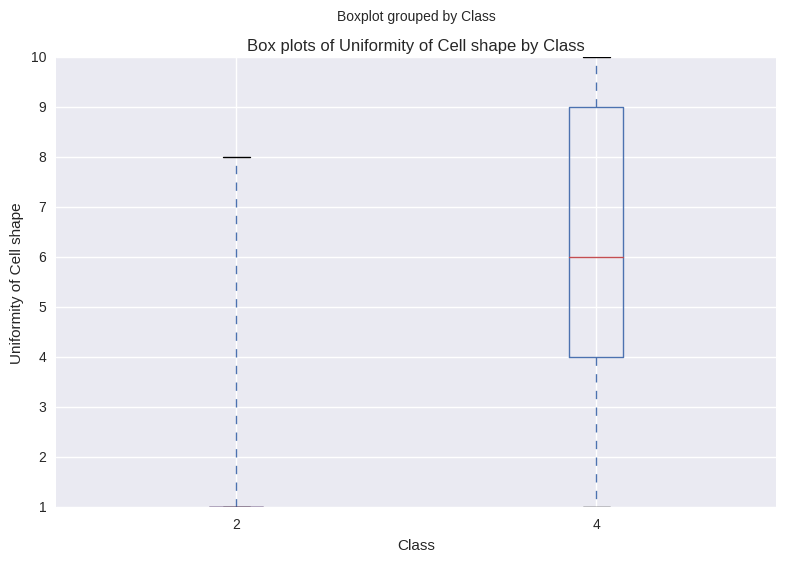

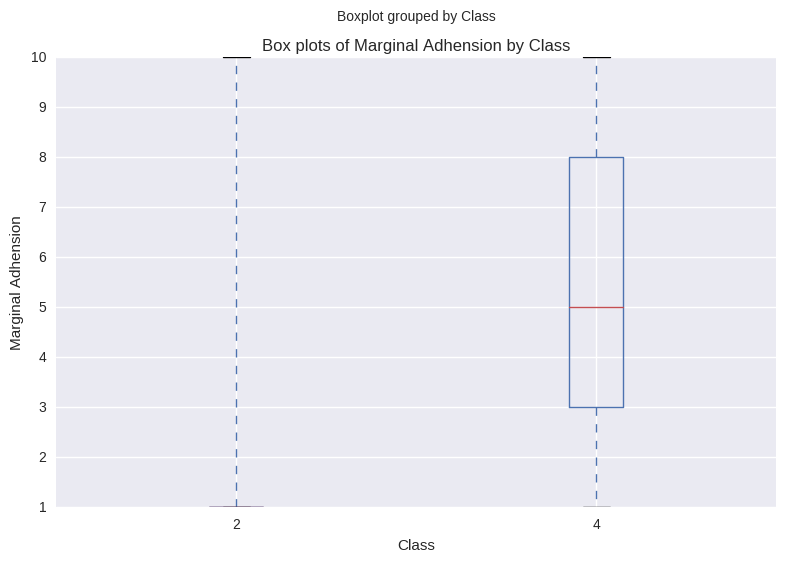

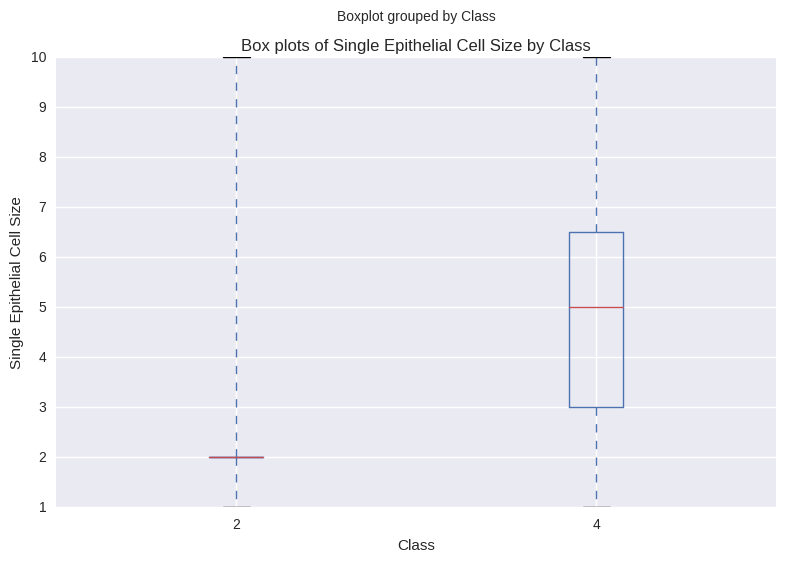

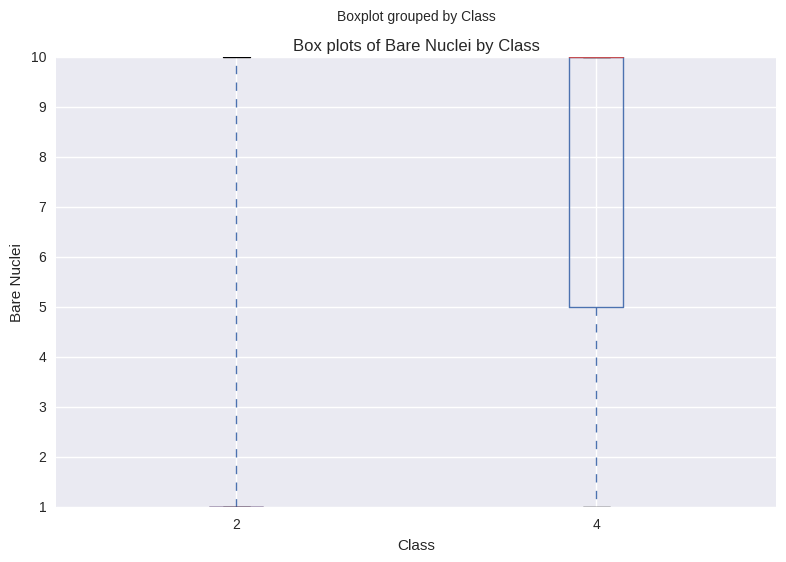

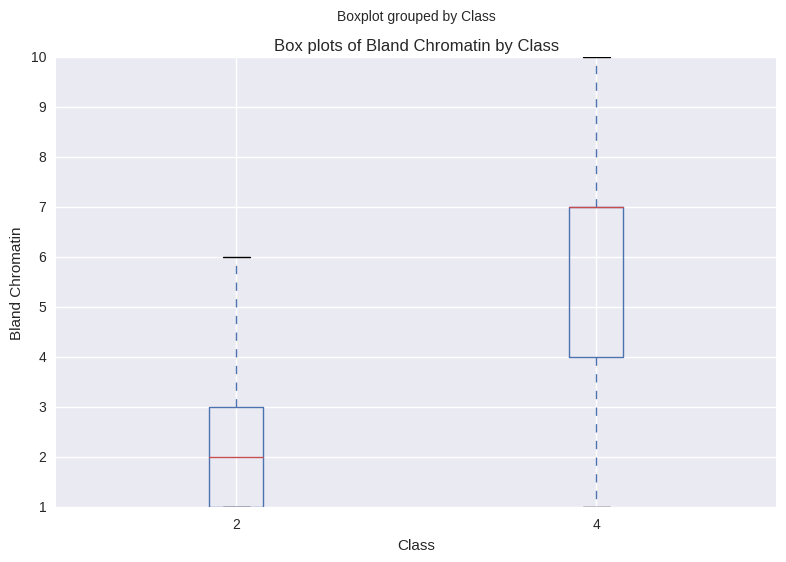

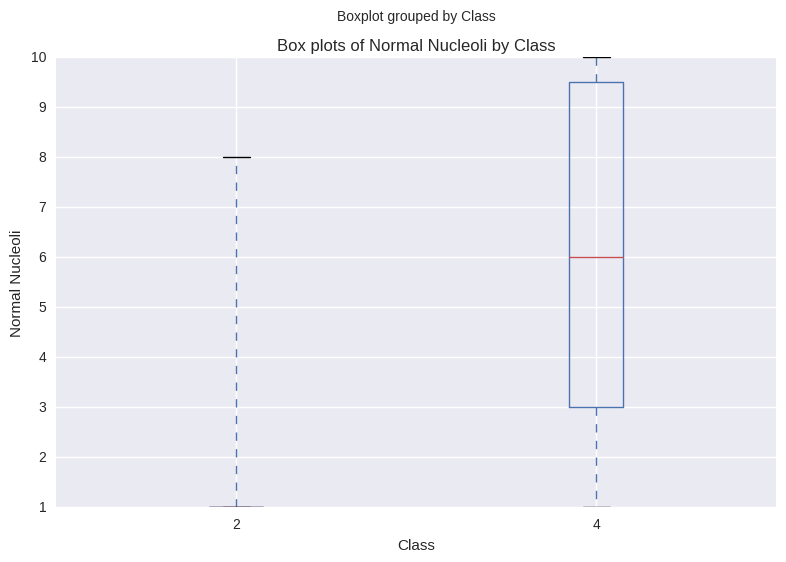

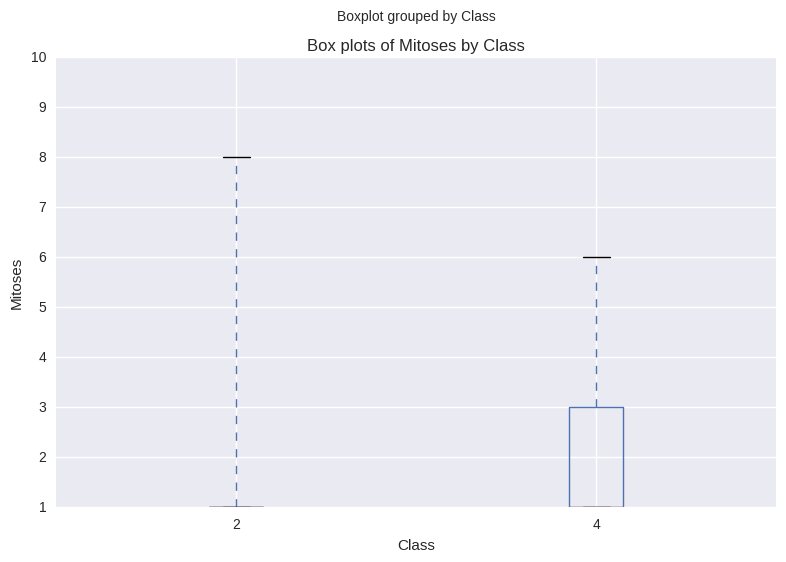

In [13]:
## Create boxplots of data
def cancer_boxplot(df, plot_cols, by):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(9, 6))
        ax = fig.gca()
        df.boxplot(column = col, by = by, ax = ax)
        ax.set_title('Box plots of ' + col + ' by ' + by)
        ax.set_ylabel(col)
    return by
cancer_boxplot(frame, plot_cols2, "Class")

['Clump Thickness',
 'Uniformity of Cell Size',
 'Uniformity of Cell shape',
 'Marginal Adhension',
 'Single Epithelial Cell Size',
 'Bare Nuclei',
 'Bland Chromatin',
 'Normal Nucleoli',
 'Mitoses']

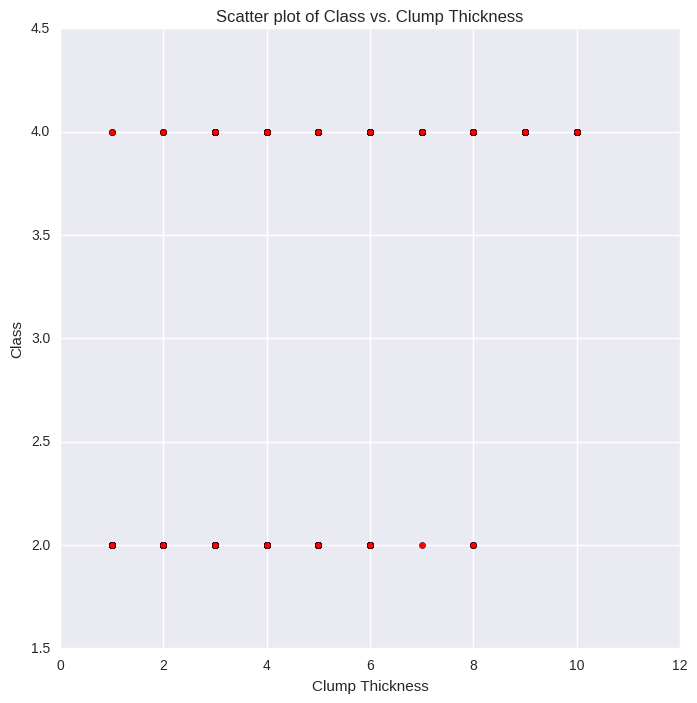

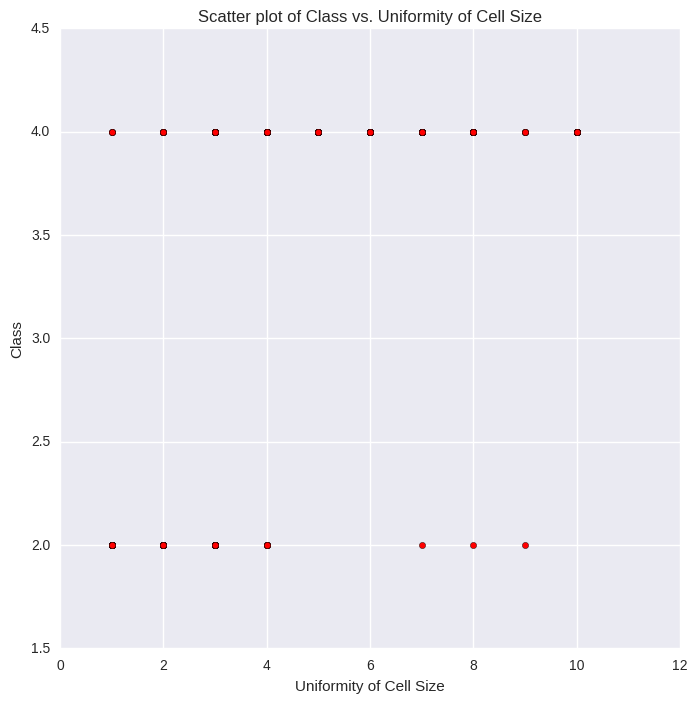

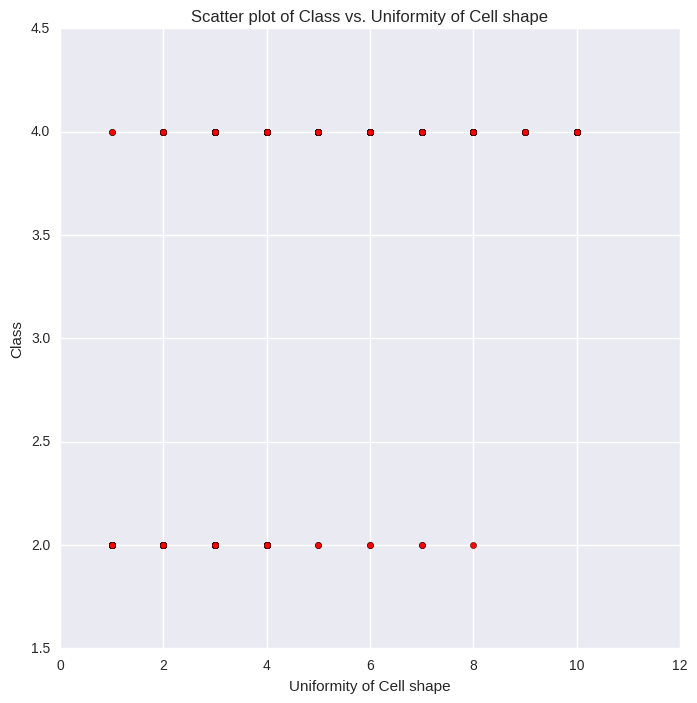

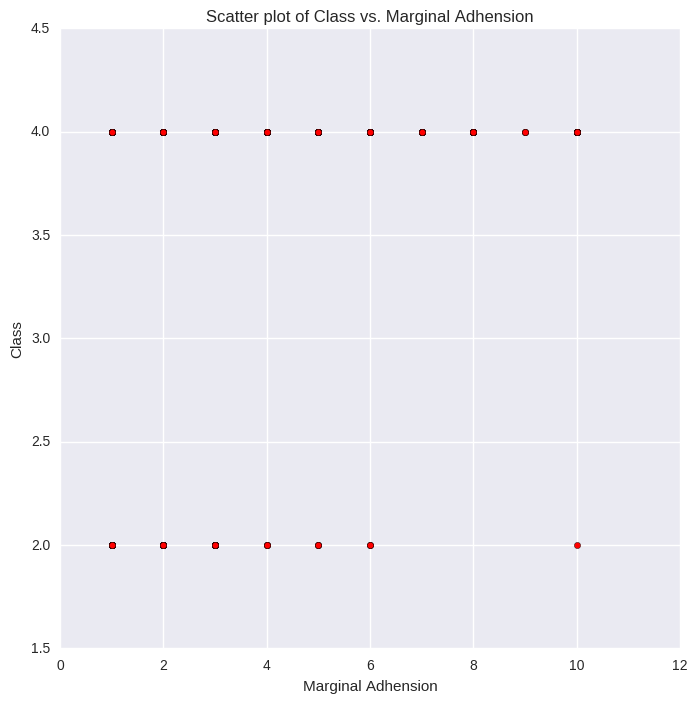

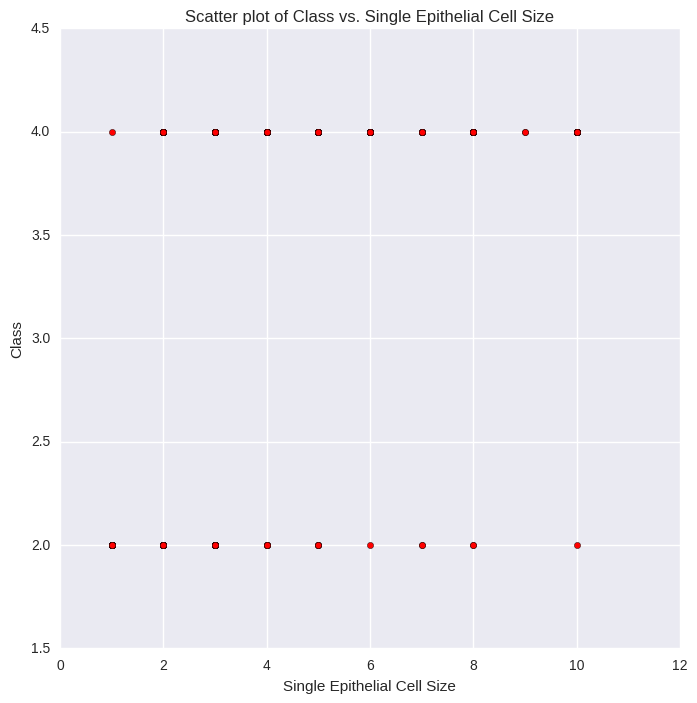

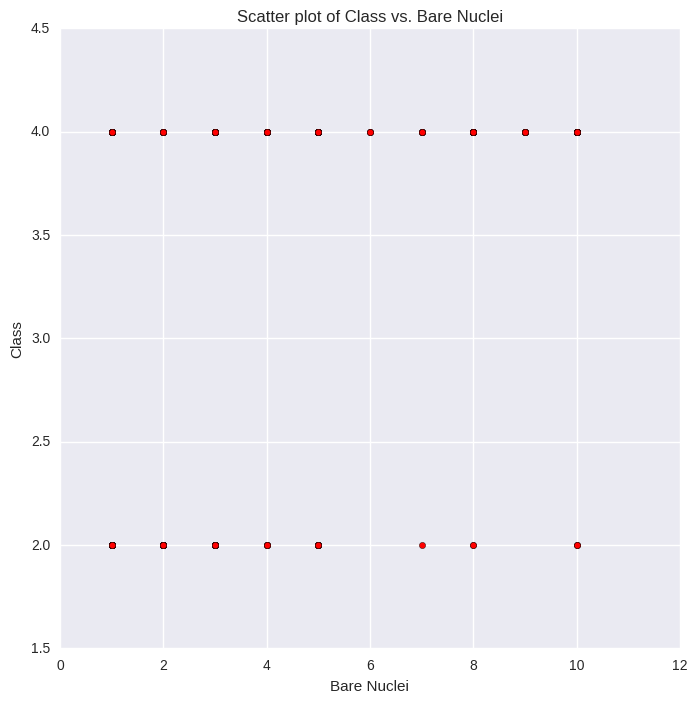

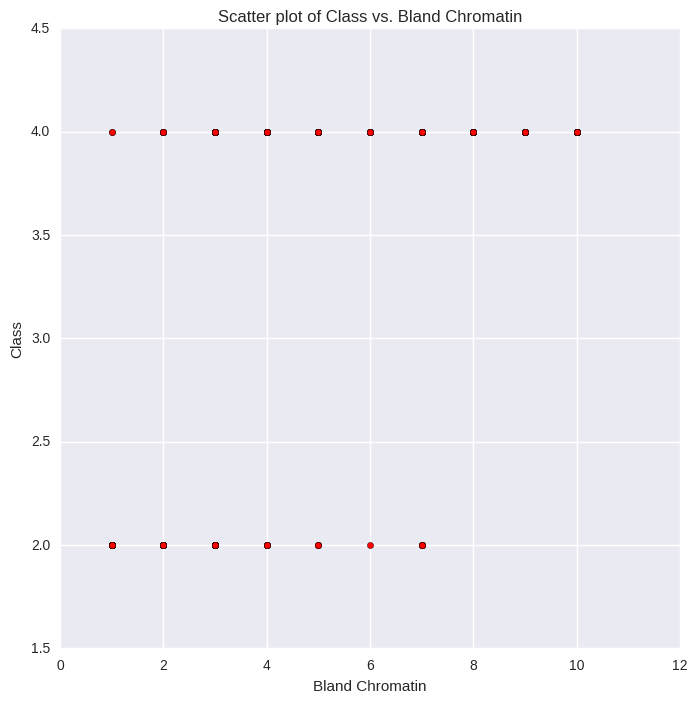

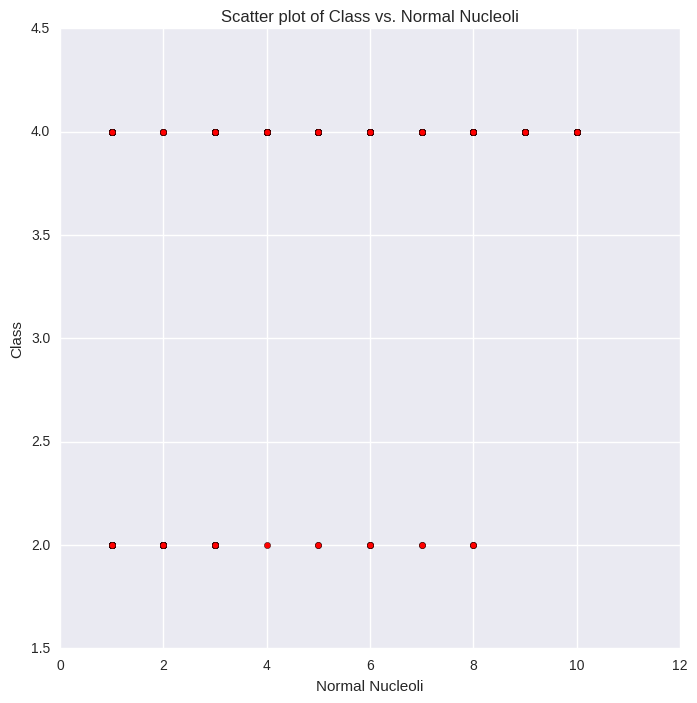

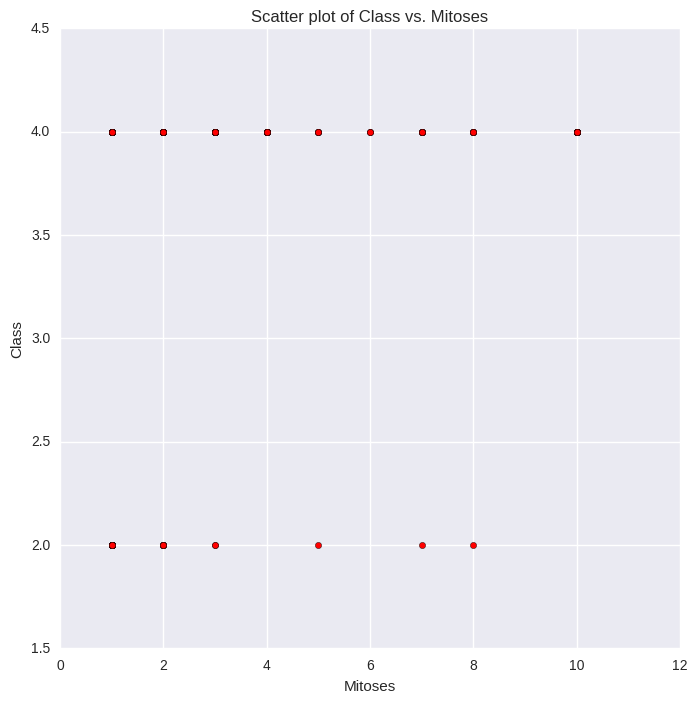

In [14]:
## Create scatter plot
def cancer_scatter(df, plot_cols):
    import matplotlib.pyplot as plt
    for col in plot_cols:
        fig = plt.figure(figsize=(8,8))
        ax = fig.gca()
        
        df.plot(kind = 'scatter', x = col, y = 'Class' ,
                   ax = ax, color = 'Red')
        ax.set_title('Scatter plot of Class vs. ' + col)
    return plot_cols

## Define columns for making scatter plots
plot_cols3 = ["Clump Thickness",
                 "Uniformity of Cell Size",
                 "Uniformity of Cell shape",
                 "Marginal Adhension",
                 "Single Epithelial Cell Size",
                 "Bare Nuclei",
                 "Bland Chromatin",
                 "Normal Nucleoli",
                 "Mitoses"]

cancer_scatter(frame, plot_cols3)